In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [9]:
iris  = load_iris()

print("\nKey Values: \n", list(iris.keys()))
print("\nFeature Names: \n", list(iris.feature_names))
print("\nTarget Names: \n", list(iris.target_names))


Key Values: 
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']

Feature Names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: 
 ['setosa', 'versicolor', 'virginica']


In [14]:
# Creating Data Matrix (X) and the Label Array (y)

X = iris["data"][:,(2,3)]
y = iris["target"]

print(X.shape)
print(y.shape)
print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(150, 2)
(150,)

X data type:  float64
y data type:  int64


In [16]:
# Split Data Into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

In [18]:
# Standardize the Data
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## OvA

In [22]:
%%time
# Model Selection

param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg'],
              'multi_class' : ['ovr'],
              'tol' : [1e-3, 1e-4], 'max_iter' : [500, 1000], 'C' : [0.1, 0.5, 1, 10, 15 ,50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv  = GridSearchCV(lg_reg, param_grid, scoring = 'f1_micro', cv = 3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (F1 score: ", lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Best Score (F1 score:  0.9583333333333334
Optimal Hyperparameter Values:  {'C': 10, 'max_iter': 500, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.001}
CPU times: user 398 ms, sys: 8.31 ms, total: 406 ms
Wall time: 777 ms


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    0.8s finished


In [24]:
# Train the Optimal Logistic Regression Classifier

lg_reg_ova = LogisticRegression(**params_optimal)
lg_reg_ova.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=500, multi_class='ovr', tol=0.001)

In [34]:
# Evaluate the Optimal Classifier on Test Data
print("No. of Iterations: ", lg_reg_ova.n_iter_)

y_test_predicted = lg_reg_ova.predict(X_test)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: {:.2f}".format(accuracy_score_test))

print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_test_predicted))
print("\nClassification Report: \n", classification_report(y_test, y_test_predicted))

No. of Iterations:  [14 10 13]

Test Accuracy: 0.97

Confusion Matrix: 
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Softmax

In [35]:
%%time
# Model Selection

param_grid = {'solver': ['lbfgs', 'newton-cg'],
              'multi_class' : ['multinomial'],
              'tol' : [1e-3, 1e-4], 'max_iter' : [500, 1000], 'C' : [0.1, 0.5, 1, 10, 15 ,50, 100]}

lg_reg_sm = LogisticRegression()

lg_reg_sm_cv  = GridSearchCV(lg_reg, param_grid, scoring = 'f1_micro', cv = 3, verbose=1, n_jobs=-1)
lg_reg_sm_cv.fit(X_train, y_train)

params_optimal = lg_reg_sm_cv.best_params_

print("Best Score (F1 score: ", lg_reg_sm_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s


Best Score (F1 score:  0.9583333333333334
Optimal Hyperparameter Values:  {'C': 0.5, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'lbfgs', 'tol': 0.001}
CPU times: user 420 ms, sys: 68.7 ms, total: 488 ms
Wall time: 1.93 s


[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    1.9s finished


In [36]:
lg_reg_softmax = LogisticRegression(**params_optimal)
lg_reg_softmax.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=500, multi_class='multinomial', tol=0.001)

In [38]:
print("No. of Iterations:", lg_reg_softmax.n_iter_ )

y_test_predicted = lg_reg_softmax.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [13]

Test Accuracy:  0.9666666666666667

Test Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Decision Boundary

In [44]:
def decision_boundary_threshold(clf, X):
    x1min, x1max = X[:,0].min() - 1, X[:,0].max() + 1
    x2min, x2max = X[:,1].min() - 1, X[:,1].max() + 1

    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_proba = clf.predict_proba(X_new)

    zz = y_proba[:,1].reshape(x1.shape)

    contour = plt.contour(x1, x2, zz, cmap = plt.cm.brg)
    plt.clabel(contour, inline = 1, fontsize = 12)

def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane = False):
    x1min, x1max = X[:,0].min() - 1, X[:,0].max() + 1
    x2min, x2max = X[:,1].min() - 1, X[:,1].max() + 1

    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, cmap = plt.cm.summer, alpha = 0.9)

    if (plotDistanceFromHyperplane  ==True):
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        plt.contourf(x1, x2, y_decision, cmap = plt.cm.bwr, alpha = 0.2)


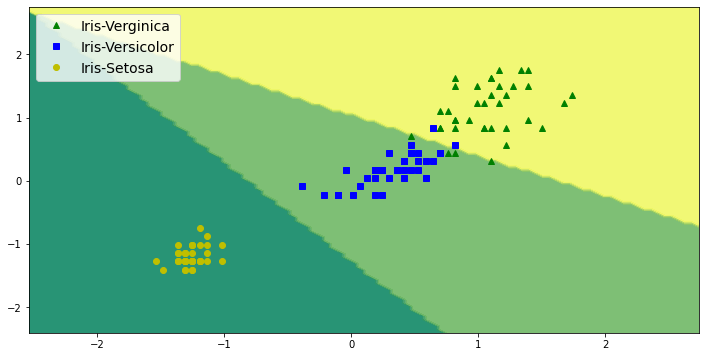

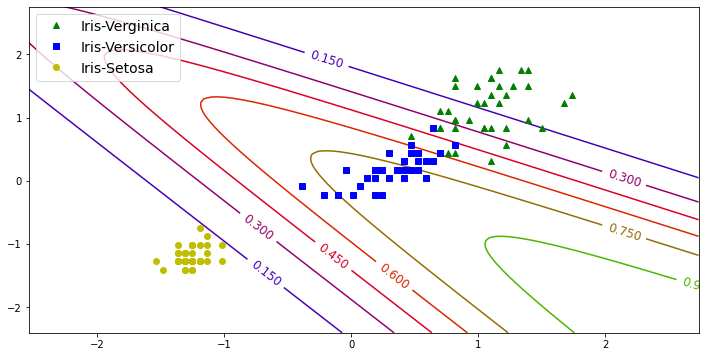

In [55]:
plt.figure(figsize=(12, 6))

decision_boundary_class_colored(lg_reg_softmax, X_train, plotDistanceFromHyperplane=False)
plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label = "Iris-Verginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label = "Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label = "Iris-Setosa")
plt.legend(loc = 'upper left', fontsize = 14)

plt.figure(figsize=(12,6))

decision_boundary_threshold(lg_reg_softmax, X_train)

plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label = "Iris-Verginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label = "Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label = "Iris-Setosa")
plt.legend(loc = 'upper left', fontsize = 14)


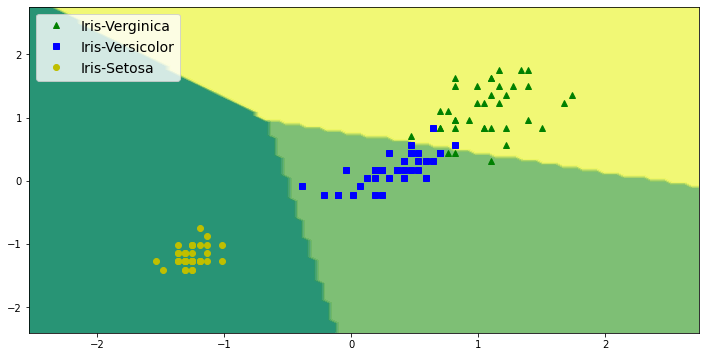

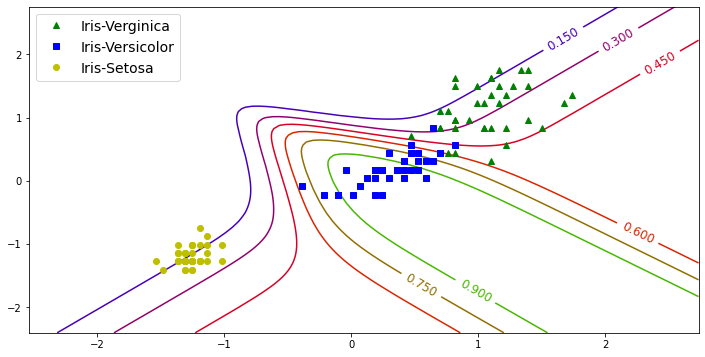

In [57]:
plt.figure(figsize=(12, 6))

decision_boundary_class_colored(lg_reg_ova, X_train, plotDistanceFromHyperplane=False)
plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label = "Iris-Verginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label = "Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label = "Iris-Setosa")
plt.legend(loc = 'upper left', fontsize = 14)

plt.figure(figsize=(12,6))

decision_boundary_threshold(lg_reg_ova, X_train)

plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label = "Iris-Verginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label = "Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label = "Iris-Setosa")
plt.legend(loc = 'upper left', fontsize = 14)
